In [28]:
import pandas as pd
import numpy as np
import seaborn as sns 
import missingno as msno
import matplotlib as mpl
import matplotlib
import platform
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

In [30]:
print(platform.system()) # 플랫폼 확인
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')
# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False
df.index = df

Windows


In [7]:
df = pd.read_csv('D:/programming/쌀_품종정보.csv')
df.head()

,품종명,품종,제현율,도정율,백미 완전립 비율,완전미도정수율,싸라기,분상질립,장폭비,심복백(0~9),...,단백질 함량(%),아밀로스함량(%),밥 맛z)관능검정(-3∼+3,투명도1~9,경도,수분,피해립,열손립,기타이물,용도 및 특이점
0,수원619호,미소찬,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,밥쌀용
1,제이제이621엠알,JJ621MR,82.9,74.4,NaN,72.3,NaN,NaN,NaN,NaN,...,6.5,19.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,밥쌀용
2,수원636호,월하미,83.6,74.1,67.8,50.2,17.2,12.5,3.2,0/2,...,6.8,23.3,NaN,1,NaN,NaN,NaN,NaN,NaN,밥쌀용:수출용(동남아시아 종자수출용)
3,전주623호,참동진,NaN,75.1,NaN,NaN,NaN,NaN,NaN,NaN,...,5.7,18.7,0.11,NaN,NaN,NaN,NaN,NaN,NaN,"밥쌀용(신동진 대체품종, 브랜드 바로적용 가능)"
4,진부63호,진평,NaN,NaN,NaN,74.3,NaN,NaN,NaN,NaN,...,5.6,18.8,0.42,NaN,NaN,NaN,NaN,NaN,NaN,밥쌀용


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   품종명                273 non-null    object 
 1   품종                 281 non-null    object 
 2   제현율                166 non-null    float64
 3   도정율                218 non-null    object 
 4   백미 완전립 비율          188 non-null    float64
 5   완전미도정수율            73 non-null     object 
 6   싸라기                22 non-null     object 
 7   분상질립               32 non-null     float64
 8   장폭비                194 non-null    float64
 9   심복백(0~9)           241 non-null    object 
 10  알카리붕괴도(1~7)        148 non-null    object 
 11  윤기치                14 non-null     float64
 12  단백질 함량(%)          167 non-null    float64
 13  아밀로스함량(%)          257 non-null    float64
 14  밥   맛z)관능검정(-3∼+3  95 non-null     object 
 15  투명도1~9             176 non-null    object 
 16  경도                 5 non-n

In [11]:
df.isnull().sum()

품종명                    8
품종                     0
제현율                  115
도정율                   63
백미 완전립 비율             93
완전미도정수율              208
싸라기                  259
분상질립                 249
장폭비                   87
심복백(0~9)              40
알카리붕괴도(1~7)          133
윤기치                  267
단백질 함량(%)            114
아밀로스함량(%)             24
밥   맛z)관능검정(-3∼+3    186
투명도1~9               105
경도                   276
수분                   281
피해립                  277
열손립                  281
기타이물                 281
용도 및 특이점             161
dtype: int64

In [12]:
df.describe()

,제현율,백미 완전립 비율,분상질립,장폭비,윤기치,단백질 함량(%),아밀로스함량(%),경도,수분,피해립,열손립,기타이물
count,166.000000,188.000000,32.000000,194.000000,14.000000,167.000000,257.000000,5.000000,0.0,4.000000,0.0,0.0
mean,82.673494,91.008404,6.053125,1.835928,66.543571,6.453293,18.816732,10.192000,NaN,0.350000,NaN,NaN
std,2.283224,8.712256,11.411313,0.218709,20.194877,0.652012,1.944763,15.780124,NaN,0.173205,NaN,NaN
min,66.400000,50.900000,0.000000,1.590000,0.310000,5.000000,0.600000,1.560000,NaN,0.200000,NaN,NaN
25%,82.000000,88.950000,1.875000,1.740000,63.025000,6.000000,18.300000,1.600000,NaN,0.275000,NaN,NaN
50%,82.800000,93.900000,3.100000,1.790000,70.900000,6.400000,18.900000,3.200000,NaN,0.300000,NaN,NaN
75%,83.600000,96.025000,6.125000,1.860000,77.000000,6.900000,19.500000,6.400000,NaN,0.375000,NaN,NaN
max,93.400000,98.900000,65.700000,3.370000,80.400000,8.500000,27.300000,38.200000,NaN,0.600000,NaN,NaN


In [40]:
df_mean = df.mean()
print(df_mean)

제현율          82.673494
백미 완전립 비율    91.008404
분상질립          6.053125
장폭비           1.835928
윤기치          66.543571
단백질 함량(%)     6.453293
아밀로스함량(%)    18.816732
경도           10.192000
수분                 NaN
피해립           0.350000
열손립                NaN
기타이물               NaN
dtype: float64


## 결측치 시각화

<AxesSubplot:>

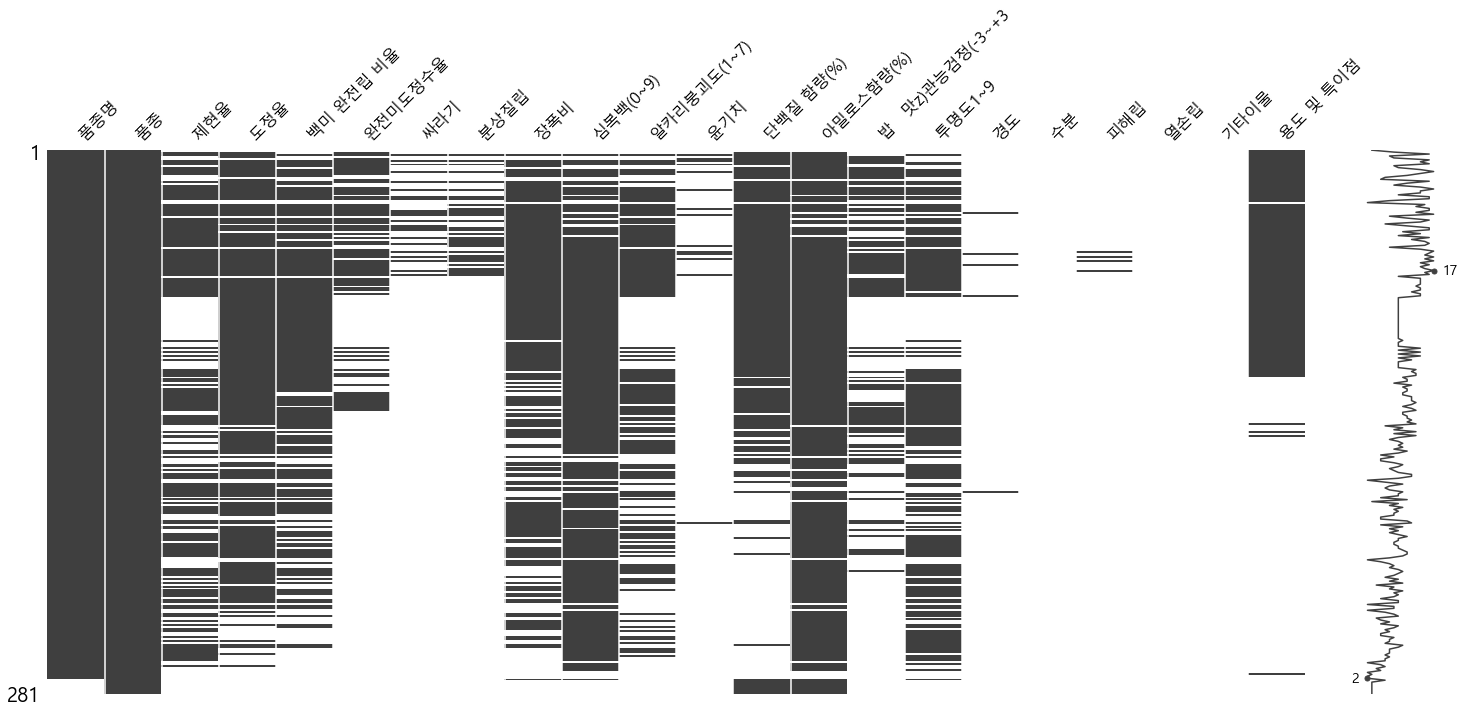

In [34]:
msno.matrix(df)

<AxesSubplot:>

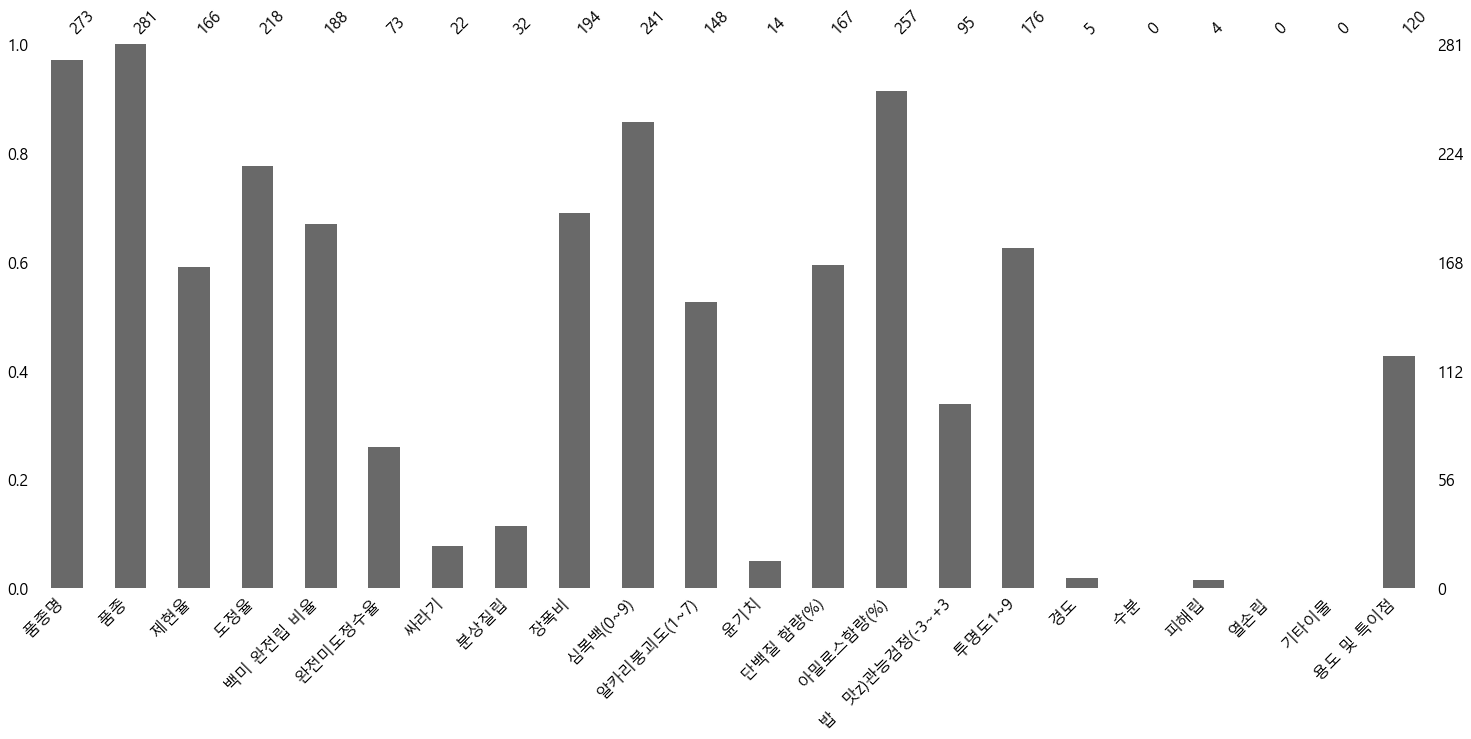

In [36]:
msno.bar(df)

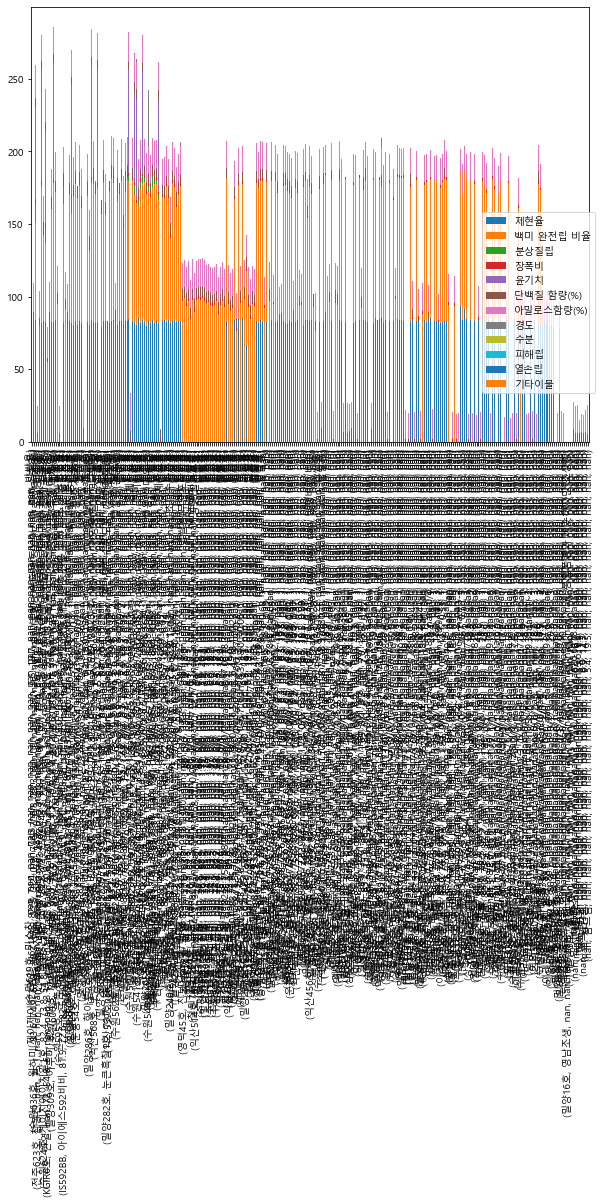

In [49]:
df.plot(kind='bar', stacked=True, figsize=(10,8))
plt.legend(loc='lower left',bbox_to_anchor=(0.8,0.1))
plt.show()